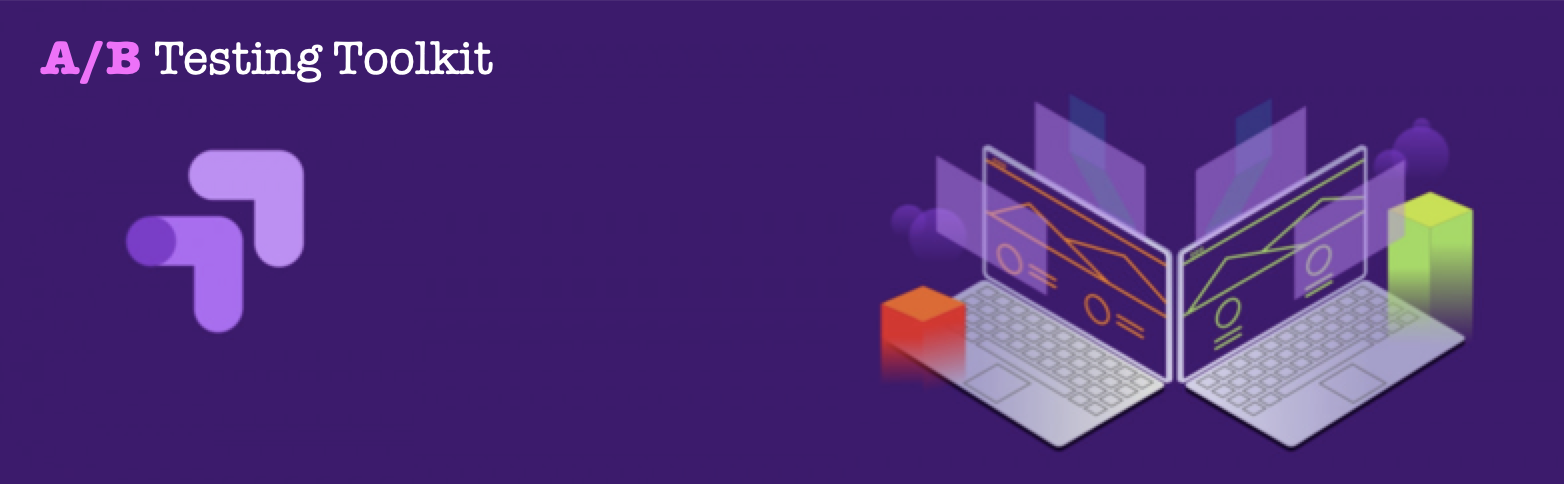

# Conversion/click-through Probability Significance Testing (Absolute Improvements)

In [3]:
## Import necessary packages for analysis 

import math as mt
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.stats import norm
import matplotlib.pyplot as plt

In [10]:
## Set pre experiment parameters

# Significance threshold

alpha = 0.05

## Z score 0.9

z_90 = 1.645

## Z score 0.95

z_95 = 1.96

## Z score 0.99

z_99 = 2.576

# Practical significance

prac_sig = 0.02

In [11]:
## Input the number of unique visitors/cookie units for the control and variant respectively

n_control = 164246

n_variant = 164206

In [12]:
## Input the number of unique events fired for the control and variant respectively 

e_control = 7883

e_variant = 8374

In [13]:
## Create data-frame with raw data which is later used for visualisations/plots

data = {'variant':  ['Control', 'Variant'],
        'n_users': [n_control, n_variant],
        'n_events': [e_control, e_variant],
        }

experiment_df = pd.DataFrame(data)

experiment_df['p_conversion'] = round(experiment_df['n_events'] / experiment_df['n_users'], 4,)

print(experiment_df)

   variant  n_users  n_events  p_conversion
0  Control   164246      7883         0.048
1  Variant   164206      8374         0.051


In [14]:
## Calculate the conversion probability for the control and variant respectively

p_control = e_control/n_control

p_variant = e_variant/n_variant

print("The conversion probability of the control group is",round(100 * p_control,4),"%")
print("The conversion probability of the variant group is",round(100 * p_variant,4),"%")

The conversion probability of the control group is 4.7995 %
The conversion probability of the variant group is 5.0997 %


In [15]:
## Calculate the pooled comversion probability 

p_pooled = (e_control + e_variant)/(n_control + n_variant)

print("The combined conversion probability is", round(100 * p_pooled,4),"%")

The combined conversion probability is 4.9496 %


In [16]:
## Calculate the pooled standard deviation/error

sd_pooled = mt.sqrt((p_pooled * (1 - p_pooled)) * (1/n_control + 1/n_variant))

print("The pooled standard deviation/error is",round(100 * sd_pooled,4),"%")

The pooled standard deviation/error is 0.0757 %


In [17]:
## Calculate the estimated difference

e_diff = p_variant - p_control

print("The estimated difference is",round(100 * e_diff,4),"%")

The estimated difference is 0.3002 %


In [18]:
## Calculate the margin of error

me = z_95 * (sd_pooled)

print("The margin of error is",round(100 * me,4),"%")

The margin of error is 0.1484 %


In [19]:
## Print and interpret the result of your experiment

## Overall change observed

print("The change observed due to the experiment is", round(e_diff*100,2),"%")

## Confidence intervals

print("Confidence intervals: [",round(e_diff * 100 - me * 100, 4),"%","-",round(100 * e_diff + 100 * me,4),"%","]")

## Result of the experiment
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",prac_sig * 100,"%","is not in the CI as well.")

The change observed due to the experiment is 0.3 %
Confidence intervals: [ 0.1518 % - 0.4485 % ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if 2.0 % is not in the CI as well.


   variant  n_users  n_events  p_conversion
0  Control   164246      7883         0.048
1  Variant   164206      8374         0.051


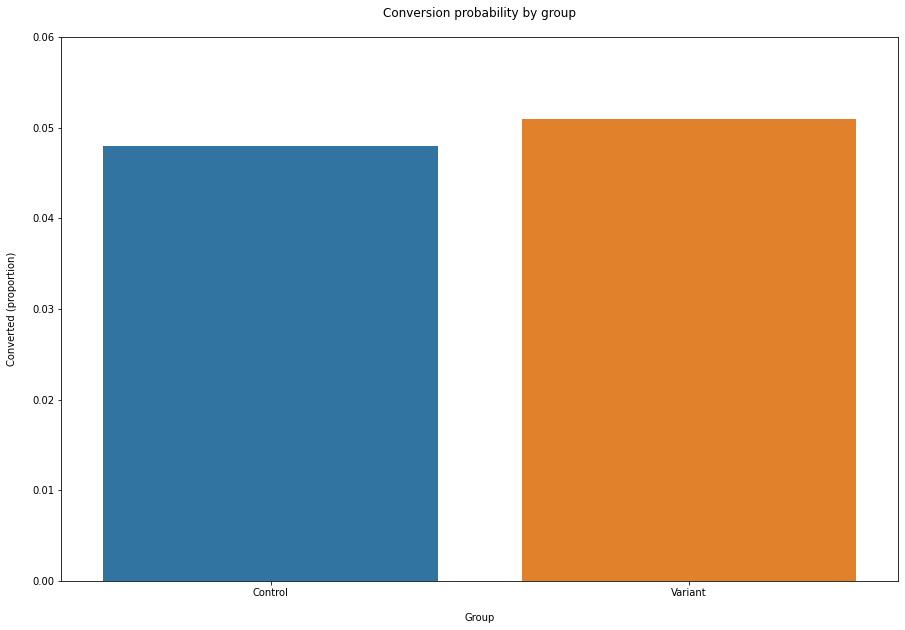

In [20]:
## Plot conversion probability with data-frame and barplot

plt.figure(figsize=(15,10))
ax = sb.barplot(x=experiment_df['variant'], y=experiment_df['p_conversion'], ci=False)
plt.ylim(0, 0.06)
plt.title('Conversion probability by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15)
print(experiment_df)

# Workings/annotations

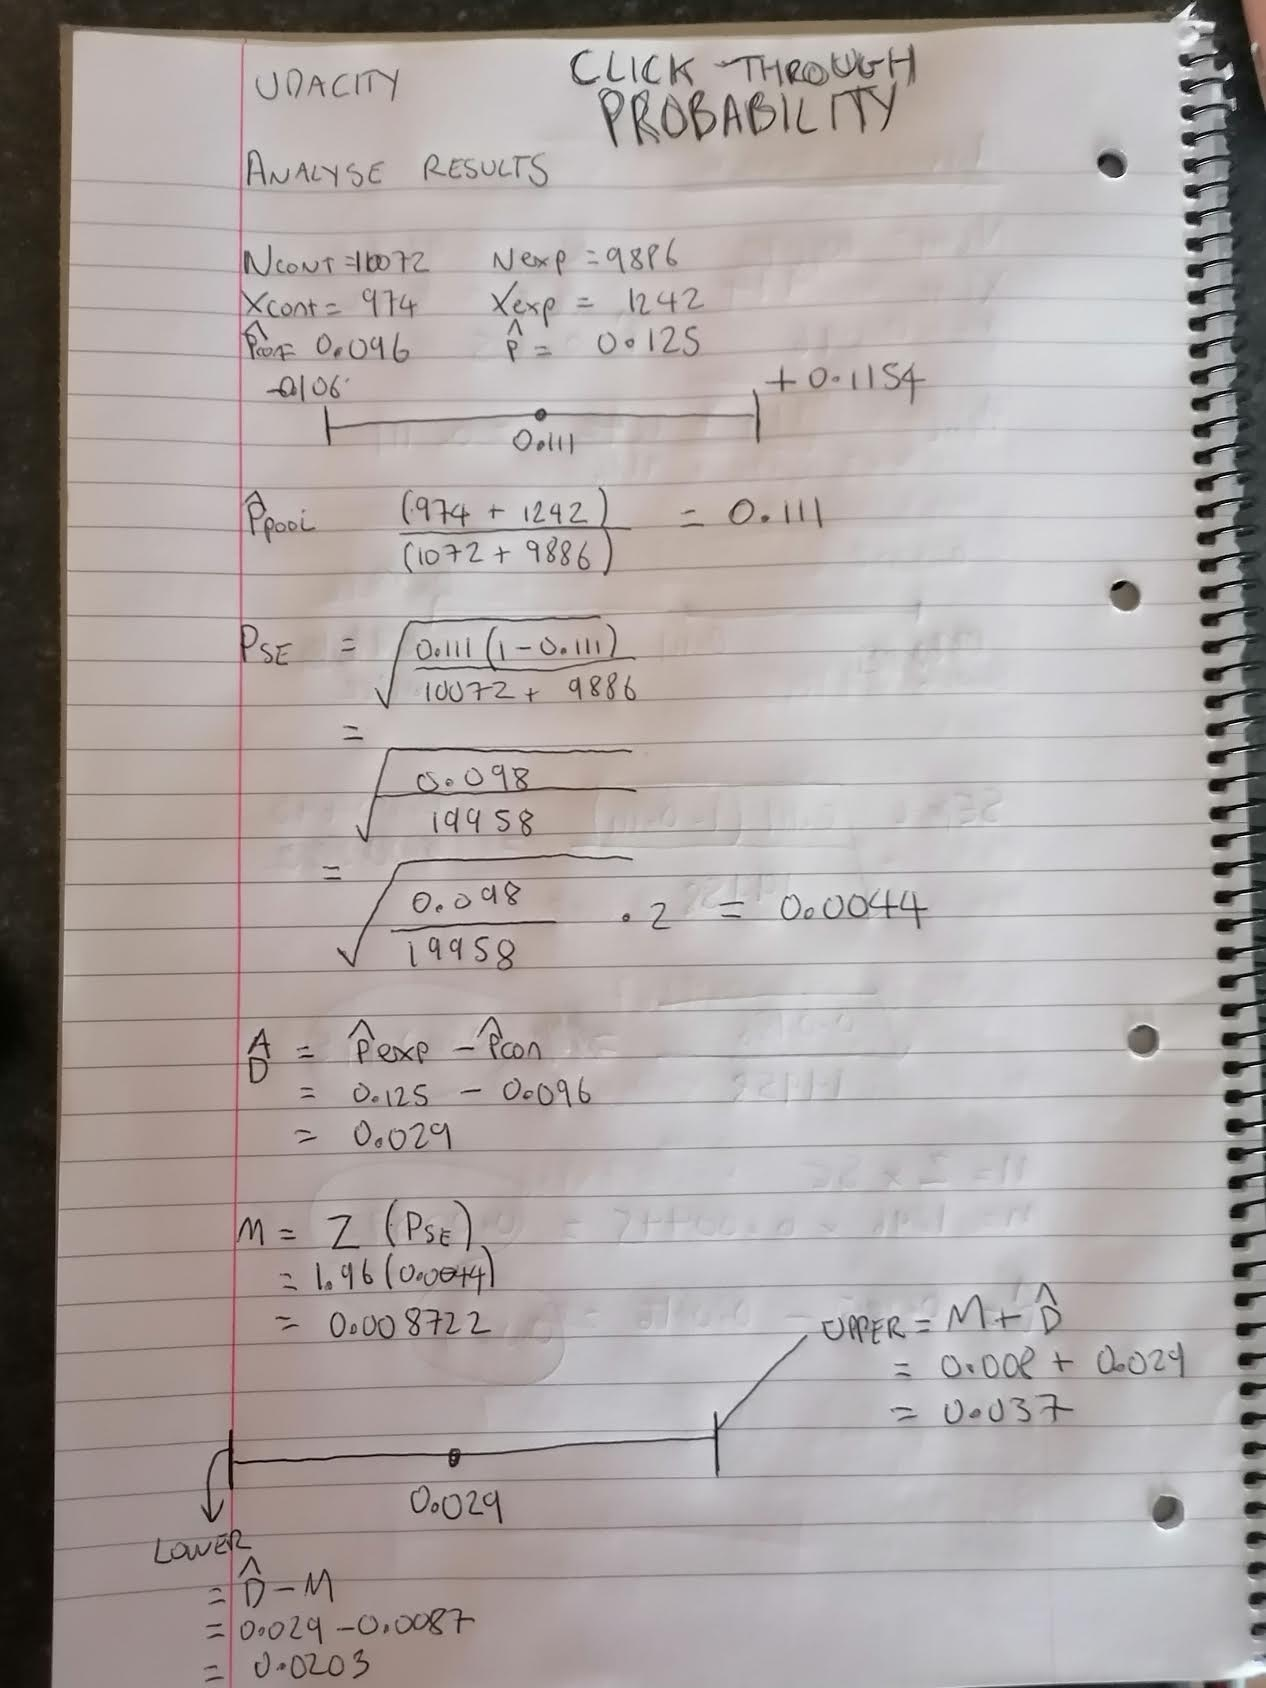